### Testing the effect of the variables on the developed model (EET-NEET)

In [1]:
#All import go here
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

### Prepare the data for testing purposes 

In [2]:
#Get and describe data
path = '/home/workspace/files/aryan/data_files_raw/eet_neet.csv'
df = pd.read_csv(path)

########################################
# Fill the numeric values with nan with 0
df['TotalDisabilty'] = df['TotalDisabilty'].fillna(0)
df['TotalMentalHealth'] = df['TotalMentalHealth'].fillna(0)

df = df.drop(['Client Number','Prev Accomodation','A2','B2', 'E2', 'F1', 'F3','H3',
              'Ref_CN', 'Ref No', 'Service Type', 'Status',
       'Area', 'Age at Start', 'Scheme','EET status'],1)

df['Session per week'] = df['Num Sessions']/df['Num Weeks']
df = df.drop(['Num Sessions','Num Weeks','Minutes per week','Economic Status','K1'],1)
df.rename(columns = {'Do They Have Any Medical Issues':'Medical Issue',
                     'Is An Interpreter required':'Intrptr Reqd',
                     'Does the YP have a local Connection':'Local Connection'}, inplace = True)

#Immigration Status
df1 = df.copy(deep=True)
vari = 'A1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'B1'
df1[vari] = np.where(df1[vari]=='-','Don\'t Know / Refused', df1[vari])
vari = 'C1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'D1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'F2'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'G1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'H1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'L1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'I1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'J1'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'Local Connection'
df1[vari] = np.where(df1[vari]=='-',np.NaN, df1[vari])
vari = 'Nationality'
series = pd.value_counts(df1[vari])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df1[vari] = np.where(df1[vari].isin(series[mask].index),'fill',df1[vari])

vari = 'Preferred Language'
series = pd.value_counts(df1[vari])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df1[vari] = np.where(df1[vari].isin(series[mask].index),'fill',df1[vari])

vari = 'Marital Status'
df1[vari] = np.where((df1[vari]=='Couple Expecting with Children') | (df1[vari]=='Married / Civil Partnership') |
                     (df1[vari]=='Couple Expecting') |
                     (df1[vari]=='Couple with children') |(df1[vari]=='Couple'),'C', df1[vari])

vari = 'Religion'
series = pd.value_counts(df1[vari])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df1[vari] = np.where(df1[vari].isin(series[mask].index),'fill',df1[vari])

# Imputing the vaues
df1['Time per Session'].fillna(df1['Time per Session'].mean(), inplace=True)
df1['Session per week'].fillna(df1['Session per week'].median(), inplace=True)

one_categ_columns = ['Initial','Medical Issue','Local Connection','Intrptr Reqd','A1','D1','E1','G1','F2','H1','J1','L1','I1','TotalDisabilty',
       'TotalMentalHealth', 'Time per Session','Session per week']
one_categ_columns_with_nan = ['Medical Issue','Local Connection','Intrptr Reqd','A1','D1','E1','G1','F2','H1','J1','L1','I1']
df1[one_categ_columns_with_nan] = df1[one_categ_columns_with_nan].fillna('No')

print(df1.shape)

a= 'Session per week'
b = 'Time per Session'
df1.head(50)

(1237, 26)


## Loading the Model

In [3]:
########################################
####### Loading the model file #########
########################################

import pickle 
# optimal Thresh is 0.41
output = open('model.pkl','rb')
best_model = pickle.load(output)
output.close()

## Transformation pipeline

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle

def transform_input(x):
    transformed = []
    
    # Label transform the data 
    
    output = open('Initial.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Initial']])
    transformed.append(a[0])
    
    output = open('MedicalIssue.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Medical Issue']])
    transformed.append(a[0])
    
    output = open('Intrptr Reqd.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Intrptr Reqd']])
    transformed.append(a[0])
    
    output = open('Local Connection.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['Local Connection']])
    transformed.append(a[0])
    
    output = open('A1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['A1']])
    transformed.append(a[0])
    
    output = open('D1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['D1']])
    transformed.append(a[0])
    
    output = open('E1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['E1']])
    transformed.append(a[0])
    
    output = open('F2.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['F2']])
    transformed.append(a[0])
    
    output = open('G1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['G1']])
    transformed.append(a[0])
    
    output = open('H1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['H1']])
    transformed.append(a[0])
    
    output = open('I1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['I1']])
    transformed.append(a[0])
    
    output = open('J1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['J1']])
    transformed.append(a[0])
    
    output = open('L1.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([x['L1']])
    transformed.append(a[0])
    
    # Standard Scale the data
    output = open('StandardScaler.pkl', 'rb')
    le = pickle.load(output)
    output.close()
    a = le.transform([[x['TotalDisabilty'],x['TotalMentalHealth'],x['Time per Session'],x['Session per week']]])
    transformed.append(a[0][0])
    transformed.append(a[0][1])
    transformed.append(a[0][2])
    transformed.append(a[0][3])
    transformed = np.asarray(transformed)
    
    #One hot encoding the data finally
    output = open('OneHotEncoder.pkl', 'rb')
    ohe = pickle.load(output)
    output.close()
    codes = ohe.transform([[x['Gender'],x['Preferred Language'],x['Nationality'],x['B1'],x['C1'],x['Marital Status'],x['Sexual Orientation'],x['Religion']]]).toarray()
    transformed = np.append(transformed,codes[0])
    transformed = np.reshape(transformed,(1,58))
    
    return transformed

### Testing teh effect

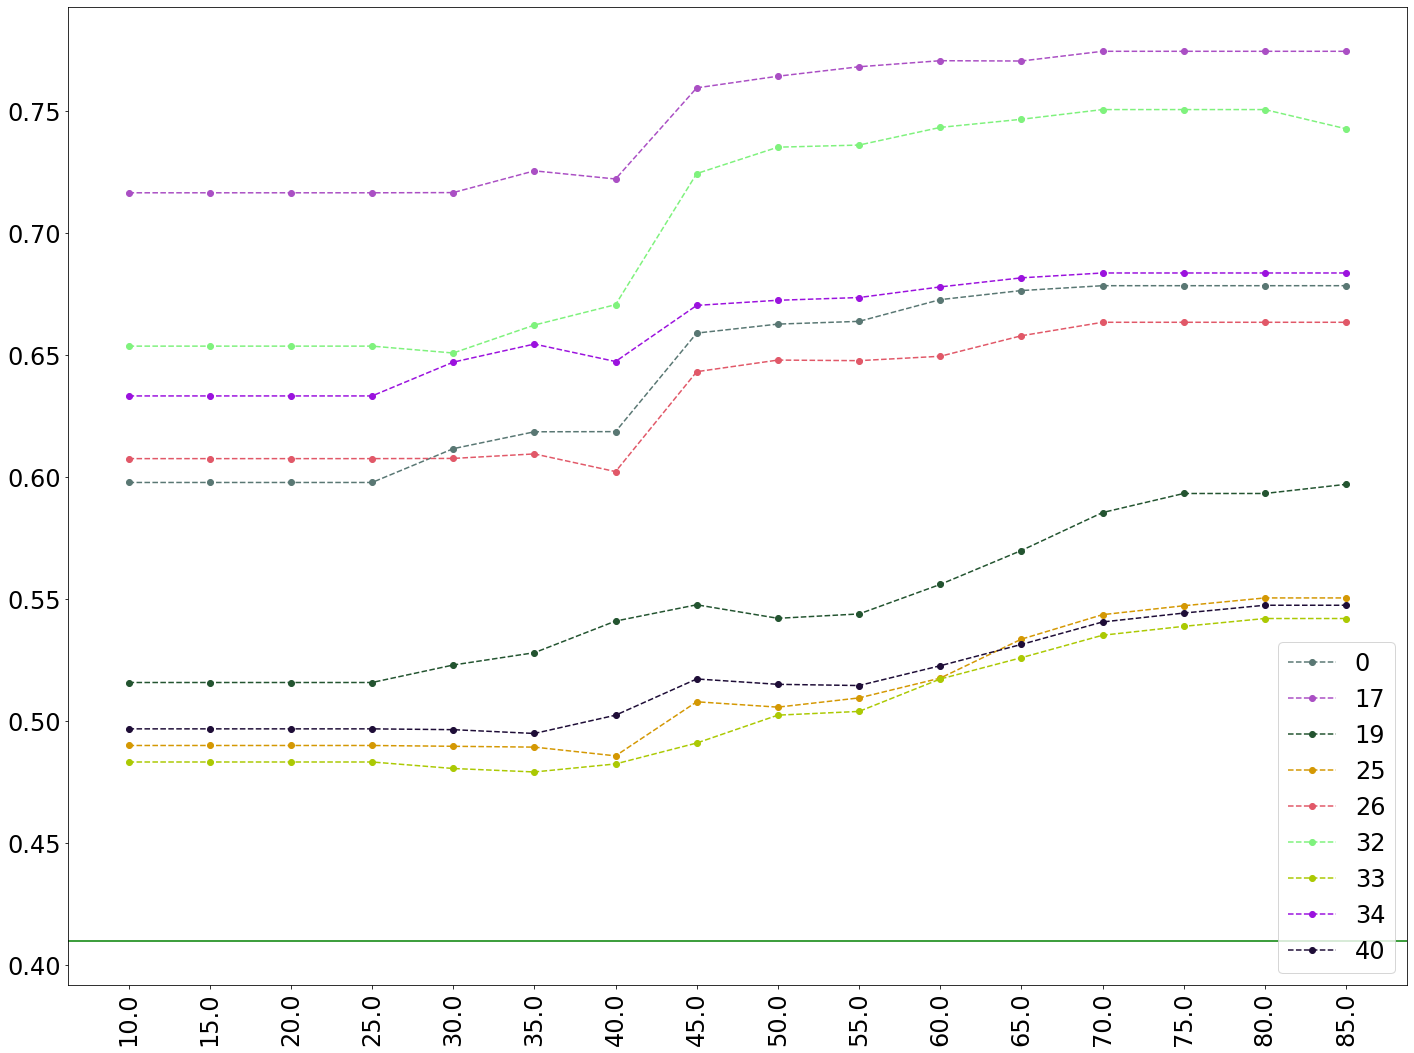

In [25]:
#########################################
######### TIME PER SESSION ###########
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,17,19,25,26,32,33,34,40]

# Just the label for plot x-axis
case = np.zeros(16, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][0]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(10.0,90.0,5.0):
        test1 = test.copy()
        test1[a] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][0]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    #ax.fill_between(samples, case-0.057, case+0.057 ,alpha=0.08, facecolor=colors[color_count])
    color_count = color_count+1

labels = np.arange(10.0,90.0,5.0)
ax.set_xticks(samples)
ax.set_xticklabels(labels, rotation=90)
ax.axhline(y=0.41, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=24

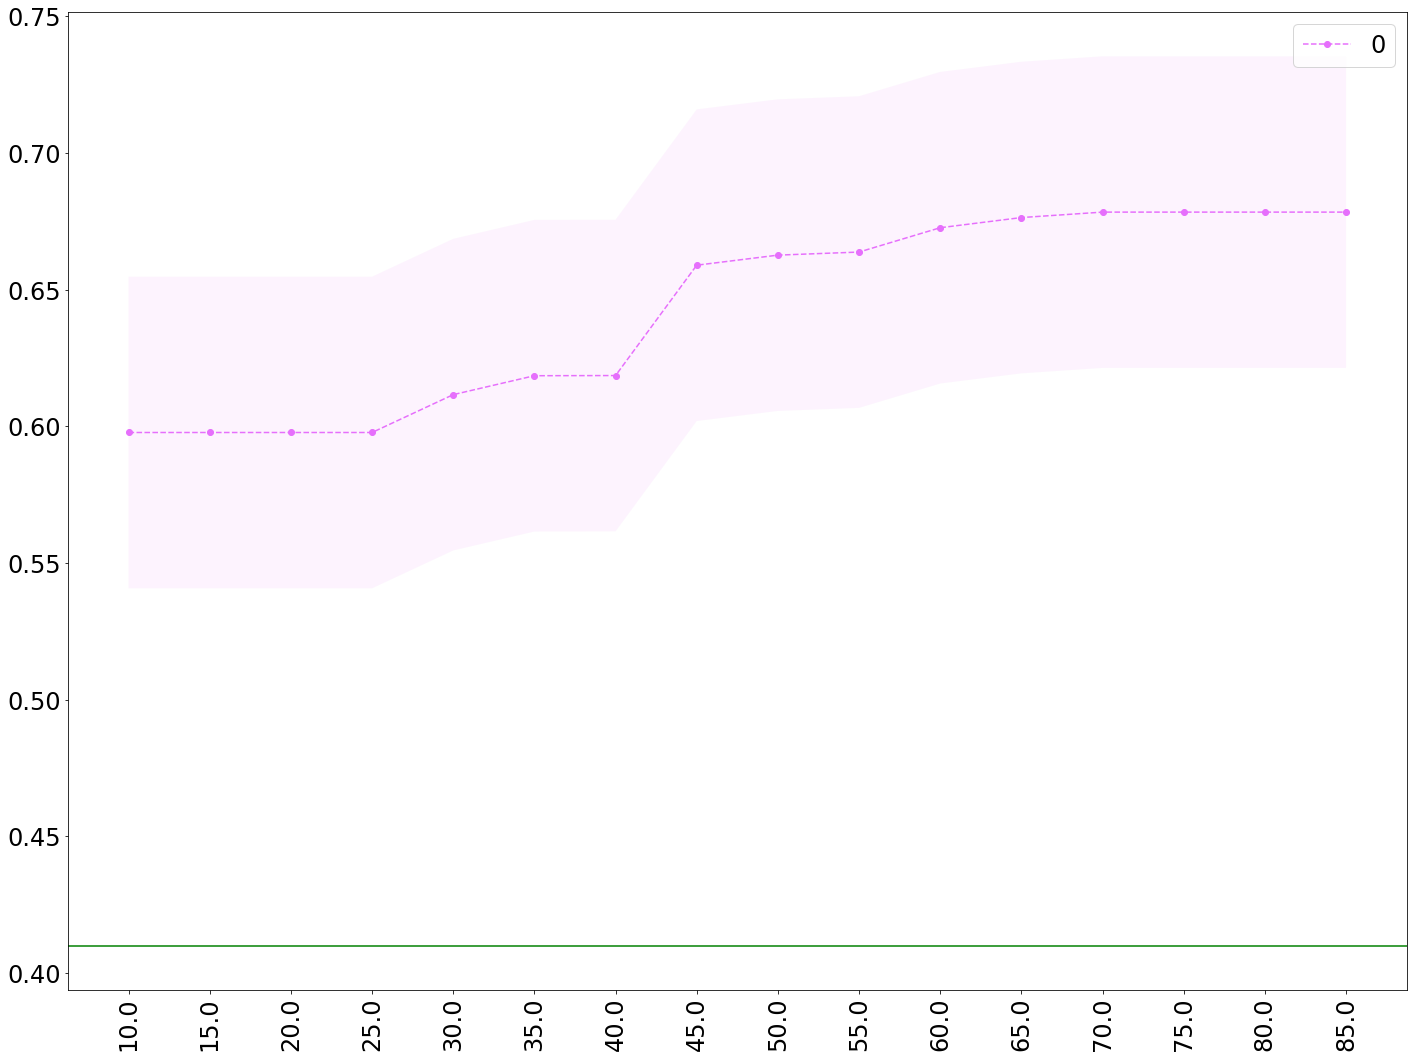

In [27]:
#########################################
######### TIME PER SESSION #############
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0]

# Just the label for plot x-axis
case = np.zeros(16, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][0]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(10.0,90.0,5.0):
        test1 = test.copy()
        test1[a] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][0]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    ax.fill_between(samples, case-0.057, case+0.057 ,alpha=0.08, facecolor=colors[color_count])
    color_count = color_count+1

labels = np.arange(10.0,90.0,5.0)
ax.set_xticks(samples)
ax.set_xticklabels(labels, rotation=90)
ax.axhline(y=0.41, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=24

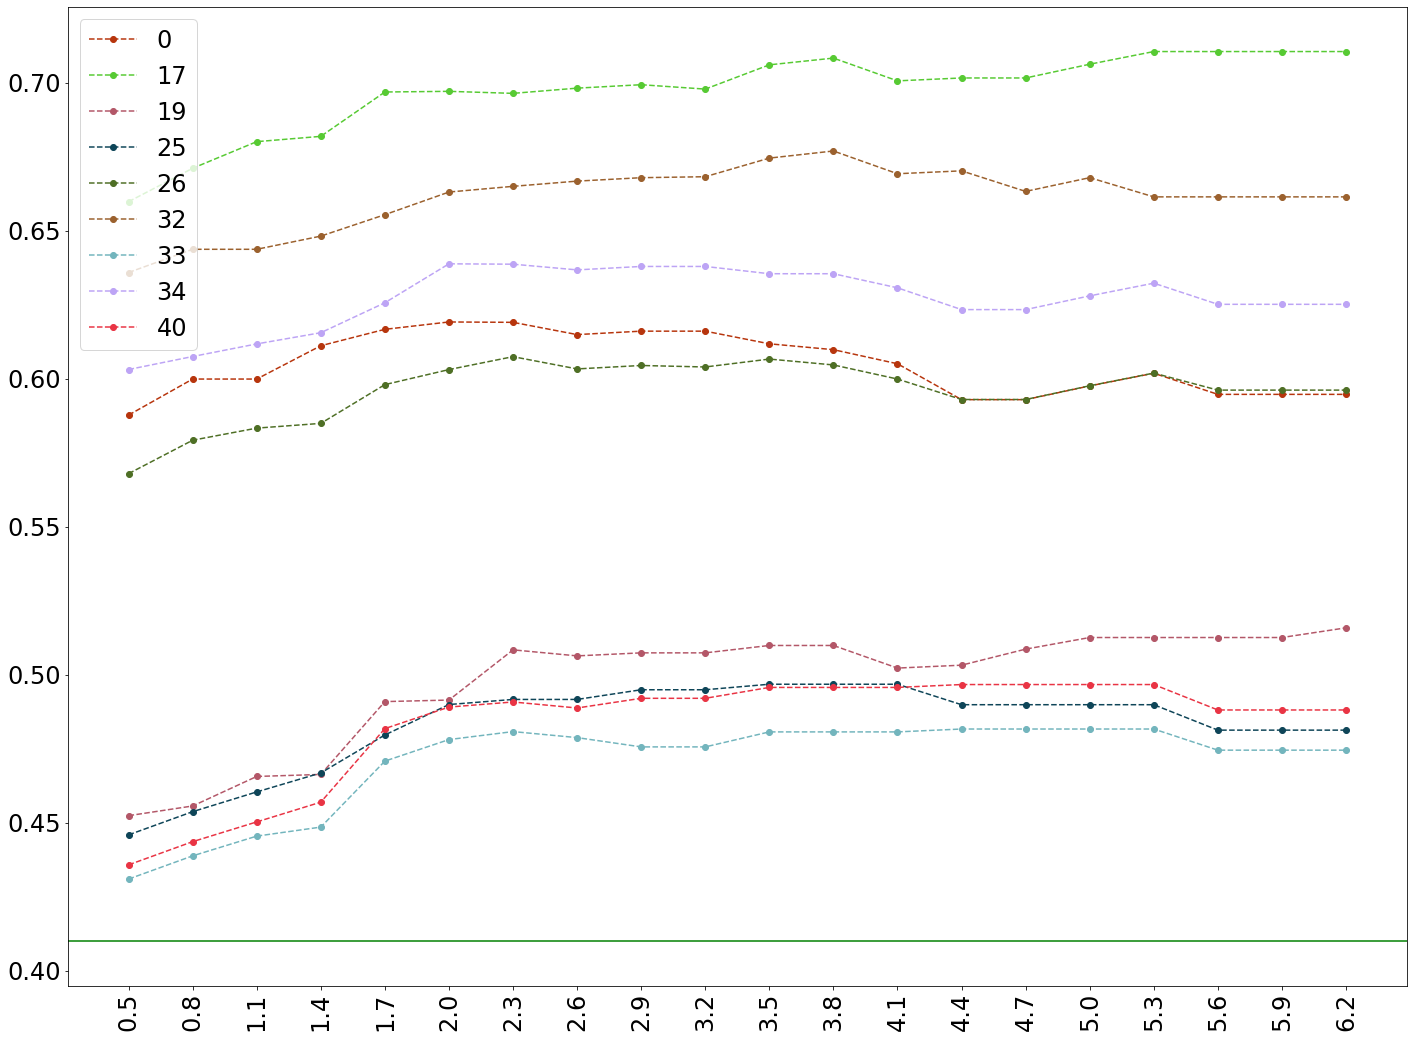

In [23]:
#########################################
########### SESSION PER WEEK ############
#########################################

import random

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

# Choosing one case from each cluster to analyse the effect
checking_list = [0,17,19,25,26,32,33,34,40]

# Just the label for plot x-axis
case = np.zeros(20, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][0]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(0.5,6.5,0.3):
        test1 = test.copy()
        test1[b] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][0]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    #ax.fill_between(samples, case-0.057, case+0.057 ,alpha=0.1, facecolor=colors[color_count])
    color_count = color_count+1

labels = np.arange(0.5,6.5,0.3)
#labels = labels.round(decimals=3)
labels = trunc(labels,1)
ax.set_xticks(samples)
ax.set_xticklabels(labels, rotation=90)
#ax.xticks(rotation=90)
ax.axhline(y=0.41, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=24

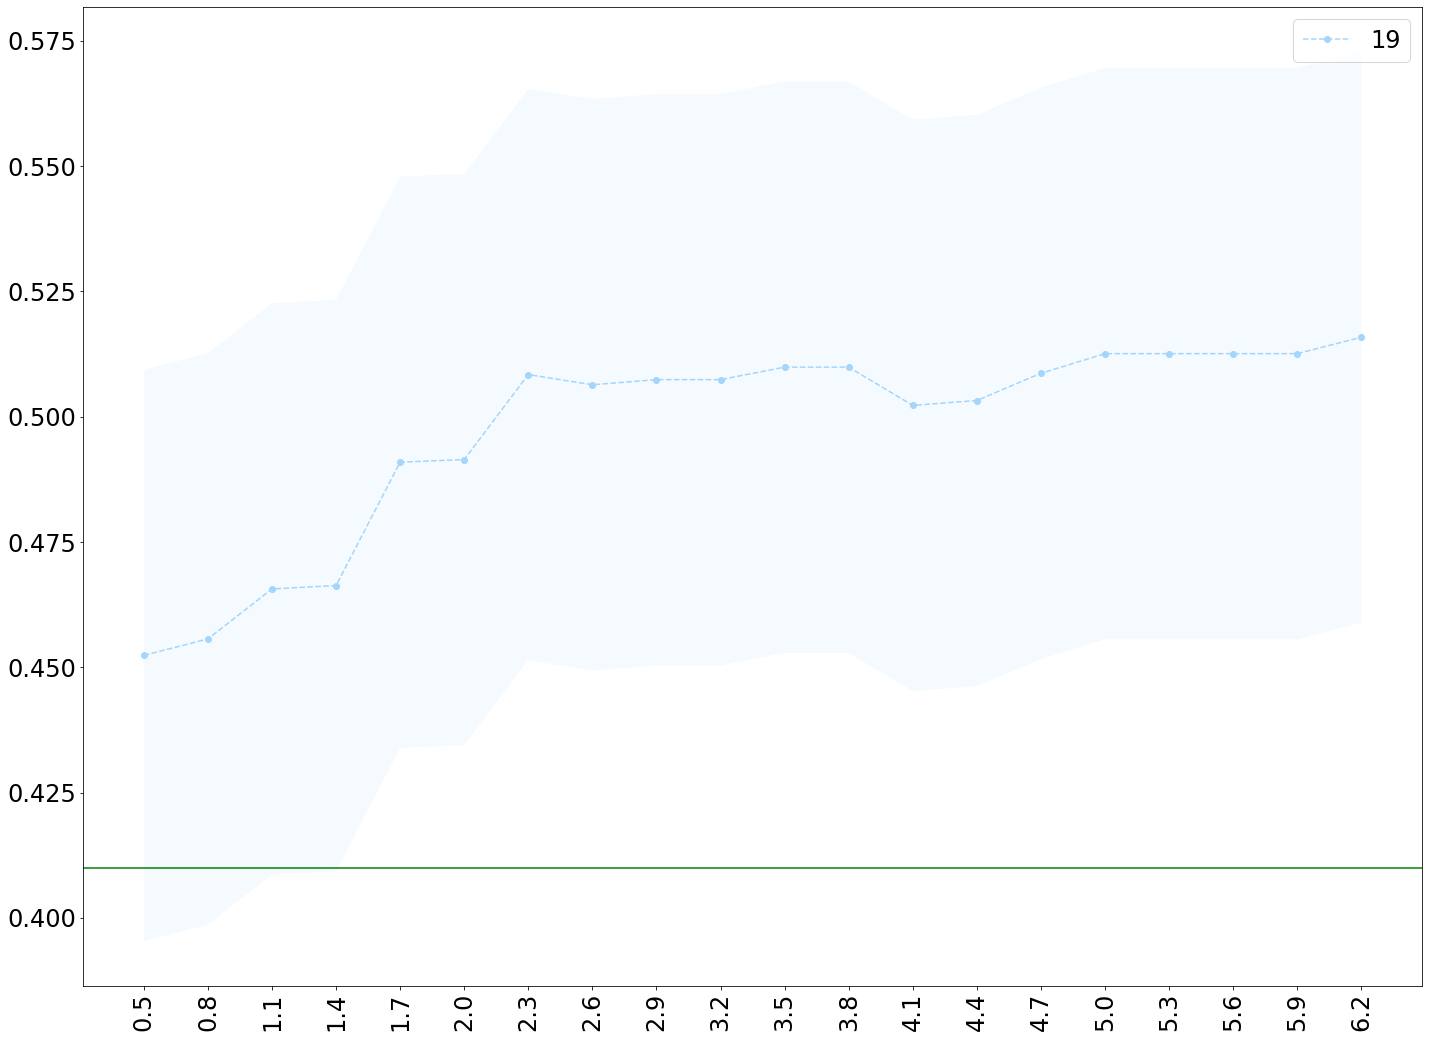

In [37]:
########################################
########### SESSION PER WEEK ############
#########################################

import random

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

# Choosing one case from each cluster to analyse the effect
checking_list = [19]

# Just the label for plot x-axis
case = np.zeros(20, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][0]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(0.5,6.5,0.3):
        test1 = test.copy()
        test1[b] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][0]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    ax.fill_between(samples, case-0.057, case+0.057 ,alpha=0.1, facecolor=colors[color_count])
    color_count = color_count+1

labels = np.arange(0.5,6.5,0.3)
#labels = labels.round(decimals=3)
labels = trunc(labels,1)
ax.set_xticks(samples)
ax.set_xticklabels(labels, rotation=90)
#ax.xticks(rotation=90)
ax.axhline(y=0.41, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=24

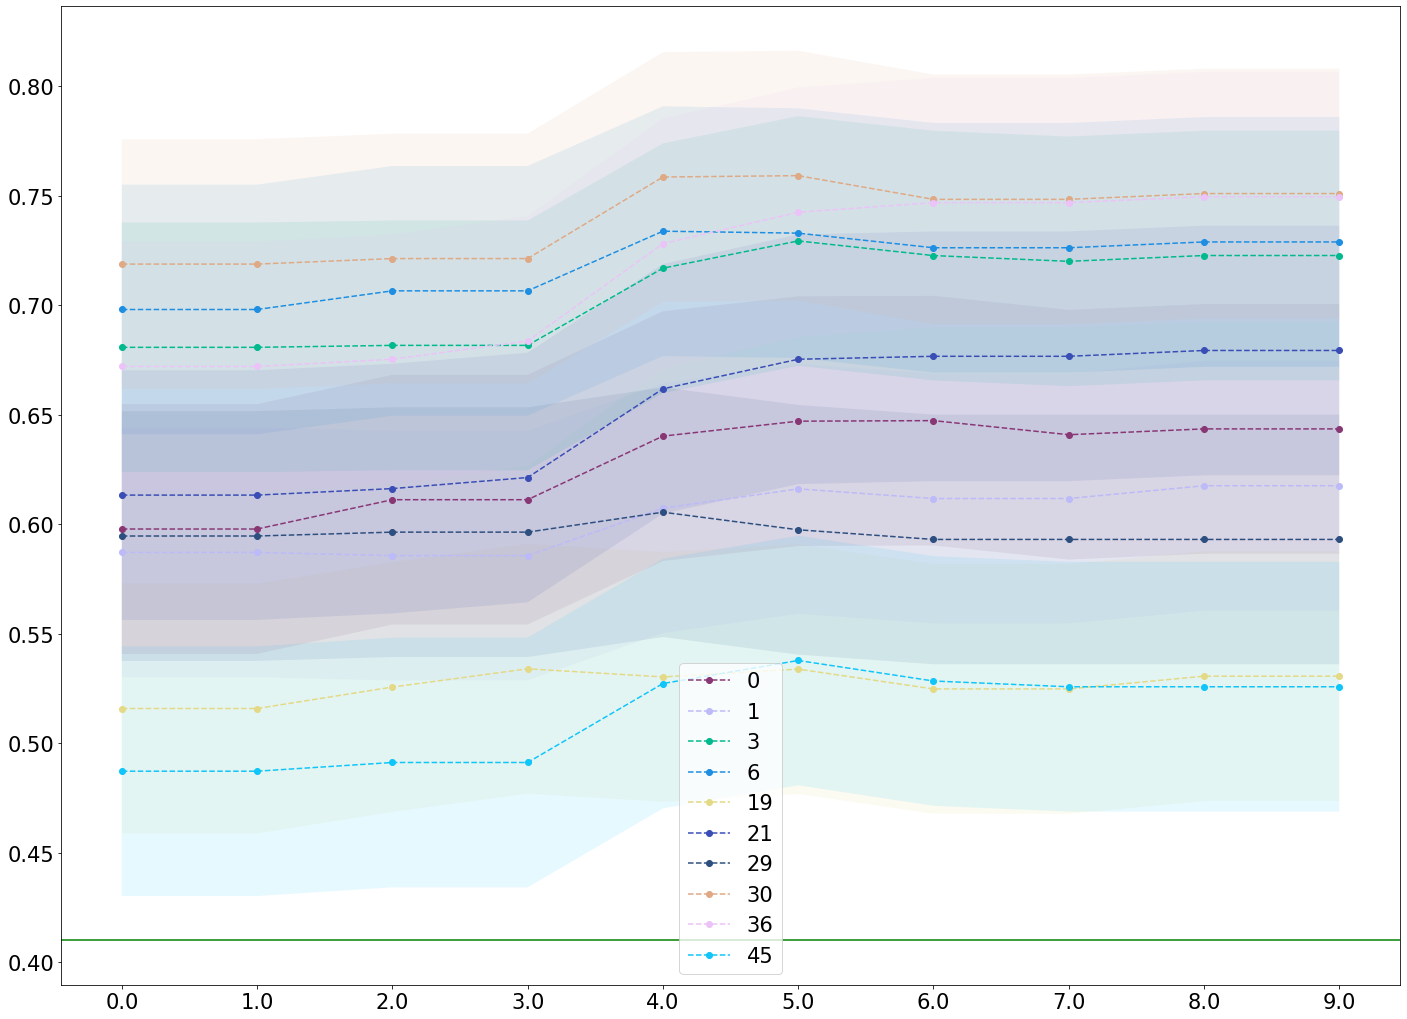

In [9]:
#########################################
############ TotalDisability ############
#########################################

import random

# Choosing one case from each cluster to analyse the effect
checking_list = [0,1,3,6,19,21,29,30,36,45]

# Just the label for plot x-axis
case = np.zeros(10, np.float64)
f, ax = plt.subplots()
samples = np.arange(0,len(case))

# Generating colors for the plot of matplotlib line poots to be ploitte d
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(checking_list))]

color_count = 0
for i in checking_list:
    test = df1[i:].to_dict(orient='records')[0]
    transformed = transform_input(test)
    probab_main = best_model.predict_proba(transformed)[0][0]
    #print('Present Scheme for first is {}'.format(test['Session per week']))
    count=0
    for s in np.arange(0.0,10.0,1.0):
        test1 = test.copy()
        test1['TotalDisabilty'] = s
        transformed = transform_input(test1)
        predicted_probab = best_model.predict_proba(transformed)[0][0]
        #print("Scheme {} predicted {}".format(i,predicted_probab))
        case[count] = predicted_probab 
        count = count +1 
    ax.plot(samples, case, linestyle='--', marker='o', color=colors[color_count], label=str(i))
    #ax.fill_between(samples, case-0.057, case+0.057 ,alpha=0.1, facecolor=colors[color_count])
    color_count = color_count+1

labels = np.arange(0.0,10.0,1.0)
ax.set_xticks(samples)
ax.set_xticklabels(labels)
ax.axhline(y=0.41, color='g', linestyle='-')

plt.legend()
plt.show()

plot_width, plot_height = (24,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['font.size']=21